In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns
from scipy import stats

# Lettura del documento

In [14]:
df = pd.read_excel(r'C:\Users\Edoar\OneDrive\Desktop\KPMG\UseCase_1_data.xlsx', sheet_name = 'Tabella')

# Filtro dati



In [19]:
filt_df0 = df[((df['claim_type']=='ZW01')|(df['claim_type']=='ZW02')|(df['claim_type']=='ZW06')) & ((df['part_number_des']=='-ECONOMY')|(df['part_number_des']=='-ECONOMY50')|(df['part_number_des']=='-E1')|(df['part_number_des']=='-E3'))]
filt_df1=filt_df0.drop_duplicates()#Rimuovo i duplicati

# Filtro per nazioni

In [20]:
countries_list=filt_df1['country'].unique()#Seleziono tutte le possibili nazioni che compaiono
lf=[None] * len(countries_list) #Creo una lista di lunghezza identica a quella di "a" contente tutti i dati per ogni nazione
for i in range(len(countries_list)):
    lf[i]=filt_df1[filt_df1['country'].isin([countries_list[i]])]


# Analisi Dati

In [21]:
k=2# Seleziona la nazione 
amount_array = lf[k]["amount"].to_numpy() #Estraggo rispettivamente gli array contente il guadagno ottenuto
workhours_array=lf[k]["work_hours"].to_numpy() #Estraggo rispettivamente il numero di ore di lavoro

# ISTOGRAMMI

## Istogrammi che riportanno rispettivamente il numero di occorrenze delle variabili "Amount" e "Hours"

## Problema: Ridurre la dimensione della griglia

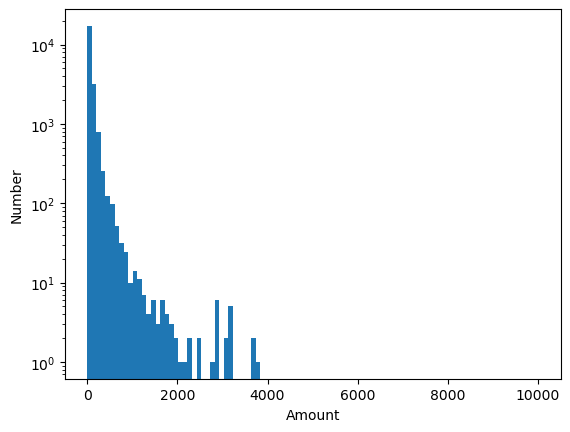

In [22]:
x = amount_array
bins = np.linspace(0,10000, 100);
plt.hist(x, bins,label='Amount')  
plt.yscale('log')
plt.ylabel('Number')
plt.xlabel('Amount')
plt.show()

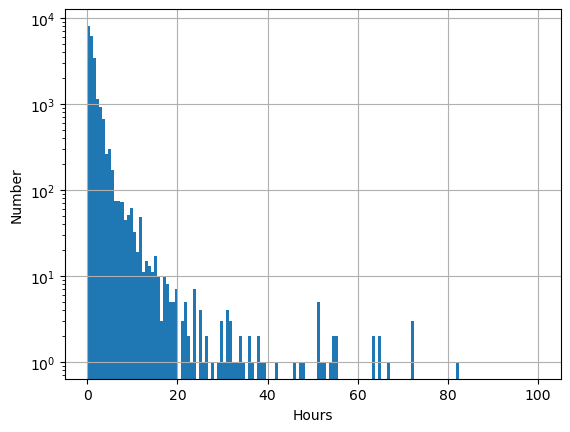

In [23]:
y=workhours_array;
bins = np.linspace(0,100, 150);
plt.yscale('log');
plt.ylabel('Number');
plt.xlabel('Hours');
plt.grid()
plt.hist(y, bins,density=None, label='Hours')
plt.show()


# Fit Lineari

## Filtra con i most_common()

In [27]:
elementi= 25 #Selezionare il numero di componenti da analizzare

In [28]:
array2=[None] * elementi 
for i in range(elementi):
    array2[i]=Counter(filt_df1['component']).most_common(elementi)[i][0]


In [51]:
new=[None] * len(countries_list) #Creo una lista di lunghezza identica a quella di "a" contente tutti i dati per ogni nazione
for i in range(len(countries_list)):
    new[i]=lf[i][lf[i]['component'].isin(array2)]

In [52]:
new[2]['country']

5         Spain
22        Spain
442       Spain
444       Spain
499       Spain
          ...  
644248    Spain
644267    Spain
644410    Spain
644432    Spain
644505    Spain
Name: country, Length: 7996, dtype: object

## Filtro ulteriore escludendo i valori che hanno zero ore di lavoro e guadagno netto e viceversa

In [30]:
new1_filt=new[(new1['work_hours']>0) & (new1['amount']>0)]

In [31]:
outliers_1=new1[(new1['work_hours']==0) | (new1['amount']==0)]

In [44]:
print('Il numero di dati scartati é:', len(outliers_1))

Il numero di dati scartati é: 279


## Plot

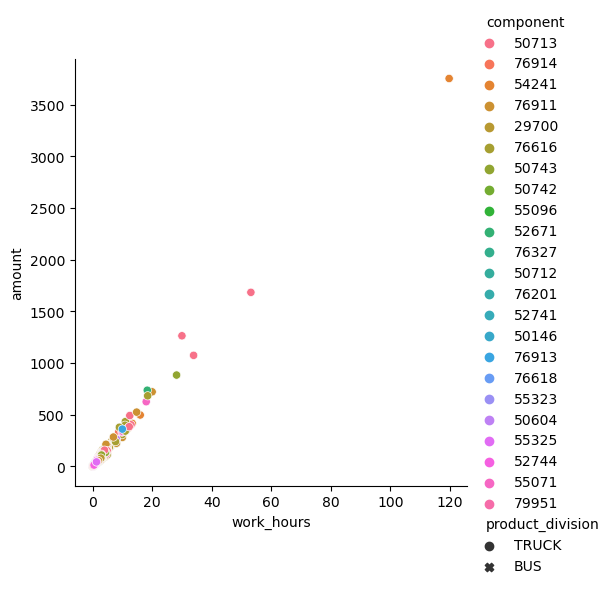

In [33]:
sns.relplot(
    data=new1_filt,
    x="work_hours", y="amount",
    hue="component", style="product_division"
)

## Fit per componente

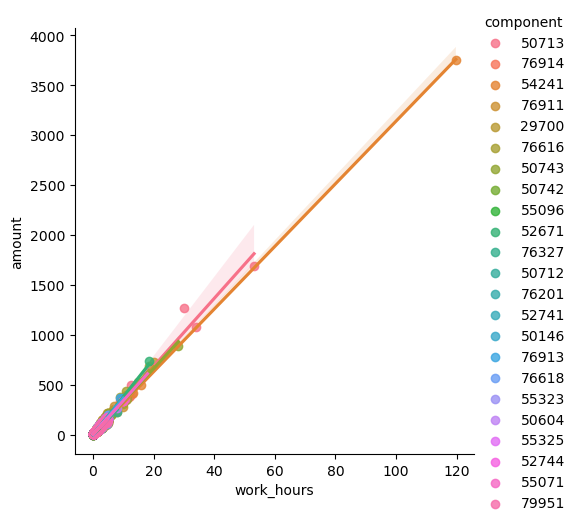

In [34]:
sns.lmplot(x="work_hours", y="amount", hue="component", data=new1_filt);

# Outliers

In [35]:
new1_filt['amount/work_hours']= new1_filt['amount']/new1_filt['work_hours']

C:\Users\Edoar\AppData\Local\Temp\ipykernel_143956\1538557867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new1_filt['amount/work_hours']= new1_filt['amount']/new1_filt['work_hours']


In [36]:
print("Numero di dati a disposizione: ",len(new1_filt))

Numero di dati a disposizione:  14596


## Box-Plot per nazione

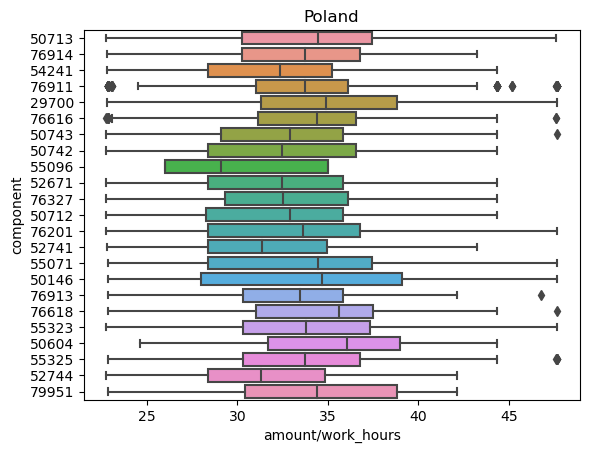

In [37]:
sns.boxplot(x=new1_filt["amount/work_hours"],y=new1["component"])
unique_arr = new1_filt["country"].unique()
plt.title(unique_arr[0])
plt.show()